[pbmc_multiomic_tutorial](https://satijalab.org/signac/articles/pbmc_multiomic.html)
[pbmc_multiomic_Rmd](https://github.com/timoast/signac/blob/master/vignettes/pbmc_multiomic.Rmd)

In [1]:
# conda activate signac_R412

library(Signac)
library(Seurat)
library(EnsDb.Hsapiens.v86)
library(BSgenome.Hsapiens.UCSC.hg38)
library(ggplot2)
library(SeuratDisk)
library(Matrix)
library(dplyr)

set.seed(1234)

Attaching SeuratObject

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loading required pack

In [2]:
# get gene annotations for hg38
annotation <- GetGRangesFromEnsDb(ensdb = EnsDb.Hsapiens.v86)
genome(annotation) <- "hg38"
# seqlevelsStyle(annotation) <- "UCSC"
chr_names <- seqlevels(annotation)
seqlevels(annotation) <- paste0('chr', chr_names)

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

Done

Fetching data...
OK

Parsing exons...
OK
Defining introns...
OK
Defining UTRs...
OK
Defining CDS...
OK

aggregating...

## Read multiome 

In [3]:
path_label <- '/lustre/scratch117/cellgen/team205/dm19/kazu/notebooks/QC_ATAC_Plus_Label_Transfer/heart_data'

In [4]:
paired_X = readMM(file.path(path_label, 'adata_paired.X.mtx'))

In [5]:
paired_X <- t(paired_X)

In [6]:
paired_obs = read.csv(file.path(path_label, 'adata_paired.obs.csv'))

In [7]:
paired_var = read.csv(file.path(path_label, 'adata_paired.var.csv'), row.names = "X")

In [8]:
colnames(paired_X) <- paired_obs$combined_barcode

In [9]:
rownames(paired_X) <- rownames(paired_var)

In [10]:
path_cell_types = '/lustre/scratch117/cellgen/team205/dm19/kazu/notebooks/scatac_label_transfer/heart'
cell_types = read.csv(file.path(path_cell_types, 'adata.obs.csv'))
cell_types <- cell_types %>% dplyr::filter(modality == 'Multiome')
colnames(cell_types)[1] <- "combined_barcode"

In [11]:
head(cell_types)

combined_barcode                                        
1 HCAHeartST10773165_HCAHeartST10781062_AATTAGGCAGCAATAA-1
2 HCAHeartST10773165_HCAHeartST10781062_GGGTCACTCATGCCTC-1
3 HCAHeartST10773165_HCAHeartST10781062_TTATGACCAATTTAGC-1
4 HCAHeartST10773165_HCAHeartST10781062_AGCTAAACAATAGCAA-1
5 HCAHeartST10773165_HCAHeartST10781062_CATTCCTCAGGCTAAG-1
6 HCAHeartST10773165_HCAHeartST10781062_CCTTACTCAATGCCTA-1
  sample_id                             modality n_counts n_genes percent_mito
1 HCAHeartST10773165_HCAHeartST10781062 Multiome 60841    8871    0.006278661 
2 HCAHeartST10773165_HCAHeartST10781062 Multiome 48108    7986    0.008023613 
3 HCAHeartST10773165_HCAHeartST10781062 Multiome 45109    7507    0.010131016 
4 HCAHeartST10773165_HCAHeartST10781062 Multiome 44053    7601    0.007150478 
5 HCAHeartST10773165_HCAHeartST10781062 Multiome 41795    8621    0.030721378 
6 HCAHeartST10773165_HCAHeartST10781062 Multiome 41475    6845    0.004846293 
  percent_ribo scrublet_score scrublet_leiden cluster_scrublet_score ⋯ doublet
1 0.003533801  0.2631579      3,10            0.2213740              ⋯ False  
2 0.003887087  0.2213740      3,19            0.1800434              ⋯ False  
3 0.002460706  0.1891892      3,19            0.1800434              ⋯ False  
4 0.003041791  0.4349776      3,6             0.1757958              ⋯ False  
5 0.012872353  0.4000000      12,1            0.2218993              ⋯ False  
6 0.001446655  0.1310345      0,1             0.1283313              ⋯ False  
  batch_key              X_scvi_batch X_scvi_labels leiden_scVI
1 AH1_Nuclei_Multiome-v1 0            0             19         
2 AH1_Nuclei_Multiome-v1 0            0             13         
3 AH1_Nuclei_Multiome-v1 0            0             13         
4 AH1_Nuclei_Multiome-v1 0            0             13         
5 AH1_Nuclei_Multiome-v1 0            0             12         
6 AH1_Nuclei_Multiome-v1 0            0             13         
  cell_type                
1 Ventricular Cardiomyocyte
2 Ventricular Cardiomyocyte
3 Ventricular Cardiomyocyte
4 Ventricular Cardiomyocyte
5 Myeloid                  
6 Ventricular Cardiomyocyte
  barcode_s                                              cell_states_HCAv1
1 HCAHeartST10773165_HCAHeartST10781062_AATTAGGCAGCAATAA                  
2 HCAHeartST10773165_HCAHeartST10781062_GGGTCACTCATGCCTC                  
3 HCAHeartST10773165_HCAHeartST10781062_TTATGACCAATTTAGC                  
4 HCAHeartST10773165_HCAHeartST10781062_AGCTAAACAATAGCAA                  
5 HCAHeartST10773165_HCAHeartST10781062_CATTCCTCAGGCTAAG                  
6 HCAHeartST10773165_HCAHeartST10781062_CCTTACTCAATGCCTA                  
  cell_states_scNym cell_states_scNym_confidence
1 vCM4              0.5179550                   
2 vCM4              0.9066231                   
3 vCM2              0.6212106                   
4 vCM4              0.7841888                   
5 EC8_ln            0.2293384                   
6 vCM4              0.5259256

In [12]:
head(paired_obs)

combined_barcode                                         sample_id         
1 HCAHeart9845435_HCAHeart9917177_CACATTAAGAGGAGGA-1       HCAHeart9845435   
2 HCAHeartST10773165_HCAHeartST10781062_TAATGCATCTTTAGGA-1 HCAHeartST10773165
3 HCAHeartST10773170_HCAHeartST10781447_TTGTCAAAGCCGCAAC-1 HCAHeartST10773170
4 HCAHeart9845436_HCAHeart9917178_TGTTGTGCACGCAACT-1       HCAHeart9845436   
5 HCAHeartST10773165_HCAHeartST10781062_TACCAGGTCGTTAACA-1 HCAHeartST10773165
6 HCAHeartST10773170_HCAHeartST10781447_CTTTGGTGTTTGAGGC-1 HCAHeartST10773170
  region_coarse region_fine      modality donor_cellnuc scrublet_score
1 SP                             paired   D8_Nuclei     0.05507745    
2 LV            LV FW ANTLAT EPI paired   AH1_Nuclei    0.19906323    
3 SAN           SAN              paired   AH1_Nuclei    0.38810198    
4 RA                             paired   D8_Nuclei     0.37735849    
5 LV            LV FW ANTLAT EPI paired   AH1_Nuclei    0.58139535    
6 SAN           SAN              paired   AH1_Nuclei    0.04691689    
  scrublet_leiden cluster_scrublet_score doublet_pval doublet_bh_pval
1 4,6             0.07459677             3.707958e-01 8.367713e-01   
2 0,35            0.13676732             5.547013e-01 9.988803e-01   
3 11,9            0.38810198             1.763787e-02 6.028203e-01   
4 6,11            0.30051813             3.314568e-04 5.667911e-03   
5 8,4             0.47572816             2.775558e-14 3.524958e-12   
6 25,0            0.08446866             4.109952e-01 6.028203e-01

In [13]:
sum(paired_obs$combined_barcode %in% cell_types$combined_barcode)

[1] 74460

In [14]:
sum(!(paired_obs$combined_barcode %in% cell_types$combined_barcode))

[1] 4433

In [15]:
paired_obs %>% filter(doublet_bh_pval < 0.1) %>% dim()

[1] 4433   11

In [16]:
paired_obs <- paired_obs %>% filter(doublet_bh_pval >= 0.1)

In [17]:
sum(!(paired_obs$combined_barcode %in% cell_types$combined_barcode))

[1] 0

In [18]:
paired_obs <- paired_obs %>% dplyr::left_join(cell_types[,c('combined_barcode', 'cell_type')])

Joining, by = "combined_barcode"



In [19]:
max(paired_X)

[1] 50629

In [20]:
dim(paired_X)

[1] 98757 78893

In [21]:
dim(paired_obs)

[1] 74460    12

In [22]:
dim(paired_X)

[1] 98757 78893

In [23]:
paired_X <- paired_X[,colnames(paired_X) %in% paired_obs$combined_barcode]

In [24]:
sum(colnames(paired_X) != paired_obs$combined_barcode)

[1] 0

In [25]:
paired_var_peaks <- paired_var %>% dplyr::filter(modality == 'Peaks')
paired_var_gex   <- paired_var %>% dplyr::filter(modality == 'Gene Expression')

In [26]:
paired_X_peaks <- paired_X[paired_var$modality == "Peaks",]

In [27]:
paired_X_gex <- paired_X[paired_var$modality == "Gene Expression",]

In [28]:
# create a Seurat object containing the RNA adata
paired_seu <- CreateSeuratObject(
  counts = paired_X_gex,
  assay = "RNA"
)

In [29]:
paired_seu[["peaks"]] <- CreateChromatinAssay(
  counts = paired_X_peaks,
  sep = c(":", "-")
)

In [30]:
DefaultAssay(paired_seu) <- "RNA"

In [31]:
paired_seu

An object of class Seurat 
98757 features across 74460 samples within 2 assays 
Active assay: RNA (31915 features, 0 variable features)
 1 other assay present: peaks

In [32]:
paired_seu <- SCTransform(paired_seu)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 28462 by 74460

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"NaNs produced"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"NaNs produced"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in sqrt(1/i):
"NaNs produced"
Warning message in theta.ml(y = y, mu =

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 82 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 28462 genes



  |======================================================================| 100%


Computing corrected count matrix for 28462 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 31.49866 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



In [33]:
paired_seu <- RunPCA(paired_seu)

PC_ 1 
Positive:  DCN, MGP, CFD, C7, APOD, PLA2G2A, NEGR1, SPARCL1, FBLN1, GSN 
	   CFH, C3, ADH1B, CST3, KAZN, FTL, C1R, F13A1, VIM, EEF1A1 
	   ABCA6, ABCA10, ABCA9, SCN7A, CDH19, LUM, CCDC80, MT-ND3, FBN1, SERPINF1 
Negative:  RYR2, TTN, FGF12, NPPA, CACNA1C, MYH6, DMD, ANKRD1, SLC8A1, CTNNA3 
	   SORBS2, NEBL, RBM20, LINC02208, MLIP, MYBPC3, MYH7, FHL2, LDB3, SGCD 
	   PRKAG2, PDE3A, MYOM1, PDLIM5, MYL4, PALLD, MYL7, ABLIM1, TECRL, LINC02248 
PC_ 2 
Positive:  F13A1, MRC1, RNASE1, C1QB, CD163, C1QA, SELENOP, LYVE1, CTSB, C1QC 
	   CD74, RBM47, FMN1, MS4A6A, SRGN, FTL, PLTP, RBPJ, MS4A4A, SAMSN1 
	   MAF, PTPRC, IQGAP2, CD14, VSIG4, MS4A4E, CYBB, MS4A7, STAB1, MSR1 
Negative:  DCN, MGP, CFD, C7, APOD, NEGR1, PLA2G2A, FBLN1, GSN, KAZN 
	   CFH, C3, SPARCL1, ADH1B, CDH19, ABCA10, SCN7A, C1R, BICC1, LUM 
	   ABCA8, FBN1, CCDC80, ABCA6, COL6A3, ABCA9, LAMA2, SERPINF1, IGFBP7, PTN 
PC_ 3 
Positive:  LDB2, ST6GALNAC3, FLT1, PKHD1L1, POSTN, VWF, ANO2, EMCN, LINC02388, MECOM 
	   NRG3, CALC

In [34]:
DefaultAssay(paired_seu) <- "peaks"

In [35]:
# paired_seu[['peaks']] <- BinarizeCounts(paired_seu[['peaks']])
paired_seu <- FindTopFeatures(paired_seu, min.cutoff = 5)

In [36]:
paired_seu <- RunTFIDF(paired_seu)

Performing TF-IDF normalization



In [37]:
paired_seu <- RunSVD(paired_seu)

Running SVD

Scaling cell embeddings



In [38]:
meta_cell_type <- as.character(paired_obs$cell_type)
names(meta_cell_type) <- paired_obs$combined_barcode

paired_seu <- AddMetaData(
  object = paired_seu,
  metadata = meta_cell_type,
  col.name = 'cell_type'  
)

In [39]:
# set the cell identities to the cell type predictions
Idents(paired_seu) <- "cell_type"

In [40]:
# build a joint neighbor graph using both assays
paired_seu <- FindMultiModalNeighbors(
  object = paired_seu,
  reduction.list = list("pca", "lsi"), 
  dims.list = list(1:50, 2:40),
  modality.weight.name = "RNA.weight",
  verbose = TRUE
)


Calculating cell-specific modality weights

Finding 20 nearest neighbors for each modality.

Calculating kernel bandwidths

Warning message in FindMultiModalNeighbors(object = paired_seu, reduction.list = list("pca", :
"The number of provided modality.weight.name is not equal to the number of modalities. SCT.weight peaks.weight are used to store the modality weights"
Finding multimodal neighbors

Constructing multimodal KNN graph

Constructing multimodal SNN graph



In [41]:
# build a joint UMAP visualization
paired_seu <- RunUMAP(
  object = paired_seu,
  nn.name = "weighted.nn",
  assay = "RNA",
  verbose = TRUE
)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
15:24:32 UMAP embedding parameters a = 0.9922 b = 1.112

15:24:35 Commencing smooth kNN distance calibration using 1 thread

15:24:36 1 smooth knn distance failures

15:24:39 Initializing from normalized Laplacian + noise

15:24:45 Commencing optimization for 200 epochs, with 2404702 positive edges

15:25:24 Optimization finished



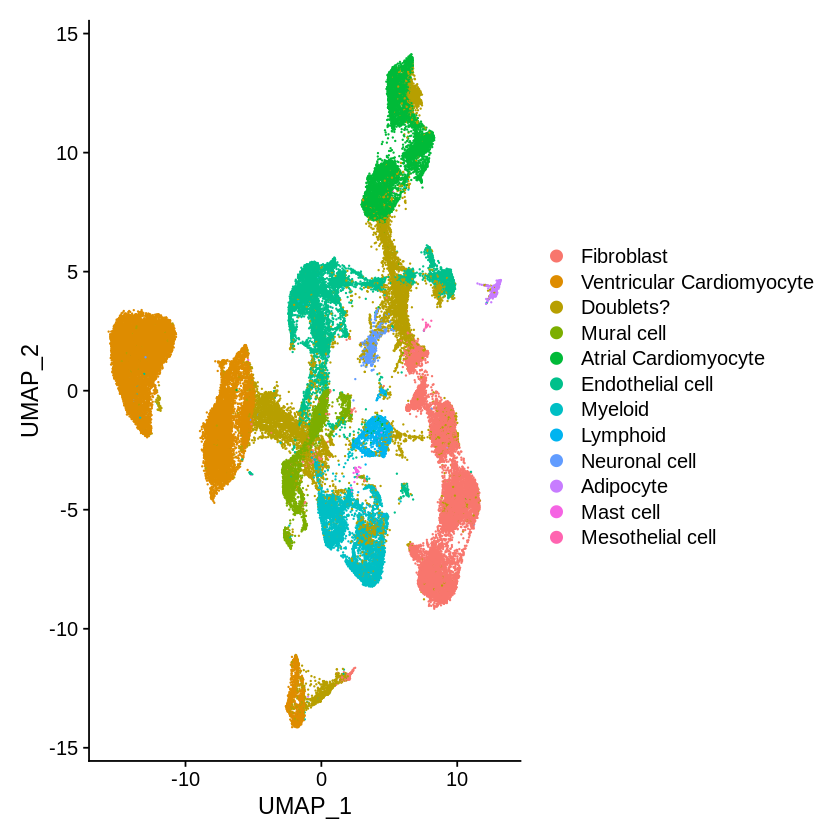

In [42]:
DimPlot(paired_seu, reduction = "umap") #+ NoLegend()

In [43]:
saveRDS(paired_seu, file.path(path_label, "heart_paired_seu.rds"))

## Read atac

In [44]:
atac_X = readMM(file.path(path_label, 'adata_atac.X.mtx'))

In [45]:
atac_X <- t(atac_X)

In [46]:
atac_obs = read.csv(file.path(path_label, 'adata_atac.obs.csv'))


In [47]:
head(atac_obs)

fullbarcode                        sample_id       protocol donor_cellnuc
1 HCAHeart8374324_AAACGAATCAAACCCA-1 HCAHeart8374324 ATAC     D5_Nuclei    
2 HCAHeart8374324_AAAGGATAGGCACTAG-1 HCAHeart8374324 ATAC     D5_Nuclei    
3 HCAHeart8374324_AAAGGGCAGCGAGCTA-1 HCAHeart8374324 ATAC     D5_Nuclei    
4 HCAHeart8374324_AAAGGGCAGTGATATG-1 HCAHeart8374324 ATAC     D5_Nuclei    
5 HCAHeart8374324_AAATGAGTCCGGGCAT-1 HCAHeart8374324 ATAC     D5_Nuclei    
6 HCAHeart8374324_AAATGAGTCGATCGCG-1 HCAHeart8374324 ATAC     D5_Nuclei    
  donor region_coarse region_fine cell_or_nuclei cellatac_clusters
1 D5    LV            NaN         Nuclei         26               
2 D5    LV            NaN         Nuclei         12               
3 D5    LV            NaN         Nuclei         11               
4 D5    LV            NaN         Nuclei         13               
5 D5    LV            NaN         Nuclei         26               
6 D5    LV            NaN         Nuclei         26               
  cellatac_code dataset barcode            oribarcode            modality     
1 1             LV      AAACGAATCAAACCCA-1 01-AAACGAATCAAACCCA-1 accessibility
2 1             LV      AAAGGATAGGCACTAG-1 01-AAAGGATAGGCACTAG-1 accessibility
3 1             LV      AAAGGGCAGCGAGCTA-1 01-AAAGGGCAGCGAGCTA-1 accessibility
4 1             LV      AAAGGGCAGTGATATG-1 01-AAAGGGCAGTGATATG-1 accessibility
5 1             LV      AAATGAGTCCGGGCAT-1 01-AAATGAGTCCGGGCAT-1 accessibility
6 1             LV      AAATGAGTCGATCGCG-1 01-AAATGAGTCGATCGCG-1 accessibility

In [48]:
atac_var = read.csv(file.path(path_label, 'adata_atac.var.csv'), row.names = "X")

In [49]:
colnames(atac_X) <- atac_obs$fullbarcode

In [50]:
rownames(atac_X) <- rownames(atac_var)

In [51]:
paired_var_peaks <- paired_var %>% dplyr::filter(modality == 'Peaks')
paired_var_gex   <- paired_var %>% dplyr::filter(modality == 'Gene Expression')

In [52]:
sum(rownames(paired_var_peaks) != rownames(atac_var))

[1] 0

In [53]:
# create object
atac.assay <- CreateChromatinAssay(
  counts = atac_X,
  sep = c(":", "-")
)
atac_seu <- CreateSeuratObject(counts = atac.assay, assay = "peaks")

Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"


In [54]:
# compute LSI
atac_seu <- FindTopFeatures(atac_seu, min.cutoff = 10)
atac_seu <- RunTFIDF(atac_seu)
atac_seu <- RunSVD(atac_seu)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



In [55]:
saveRDS(atac_seu, file.path(path_label, "heart_atac_seu.rds"))

*** Merge and integrate datasets ***

In [56]:
# first add dataset-identifying metadata
atac_seu$dataset <- "ATAC"
paired_seu$dataset <- "Multiome"

# merge
seu.combined <- merge(atac_seu, paired_seu)

In [57]:
# process the combined dataset
seu.combined <- FindTopFeatures(seu.combined, min.cutoff = 10)
seu.combined <- RunTFIDF(seu.combined)
seu.combined <- RunSVD(seu.combined)
seu.combined <- RunUMAP(seu.combined, reduction = "lsi", dims = 2:30)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

15:52:15 UMAP embedding parameters a = 0.9922 b = 1.112

15:52:16 Read 122558 rows and found 29 numeric columns

15:52:16 Using Annoy for neighbor search, n_neighbors = 30

15:52:16 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:52:38 Writing NN index file to temp file /tmp/RtmpP4Auk5/file28e46a4d4057

15:52:38 Searching Annoy index using 1 thread, search_k = 3000

15:53:31 Annoy recall = 100%

15:53:44 Commencing smooth kNN distance calibration using 1 thread

15:54:19 Initializing from normalized Laplacian + noise

15:54:27 Commencing optimization for 200 epochs, with 5670162 positive edges

15:55:40 Optimization finished



In [58]:
p1 <- DimPlot(seu.combined, group.by = "dataset")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



In [59]:
# find integration anchors
integration.anchors <- FindIntegrationAnchors(
  object.list = list(paired_seu, atac_seu),
  anchor.features = rownames(paired_seu),
  reduction = "rlsi",
  dims = 2:30
)

# integrate LSI embeddings
integrated <- IntegrateEmbeddings(
  anchorset = integration.anchors,
  reductions = seu.combined[["lsi"]],
  new.reduction.name = "integrated_lsi",
  dims.to.integrate = 1:30
)

# create a new UMAP using the integrated embeddings
integrated <- RunUMAP(integrated, reduction = "integrated_lsi", dims = 2:30)
p2 <- DimPlot(integrated, group.by = "dataset")

Computing within dataset neighborhoods

Finding all pairwise anchors

Warning message:
"No filtering performed if passing to data rather than counts"
Projecting new data onto SVD

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 6141 anchors

Warning message:
"Attempting to merge an SCTAssay with another Assay type 
Converting all to standard Assay objects."
Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

16:12:40 UMAP embedding parameters a = 0.9922 b = 1.112

16:12:40 Read 122558 rows and found 29 numeric columns

16:12:40 Using Annoy for neighbor search, n_neighbors = 30

16:12:40 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:12:54 Wri

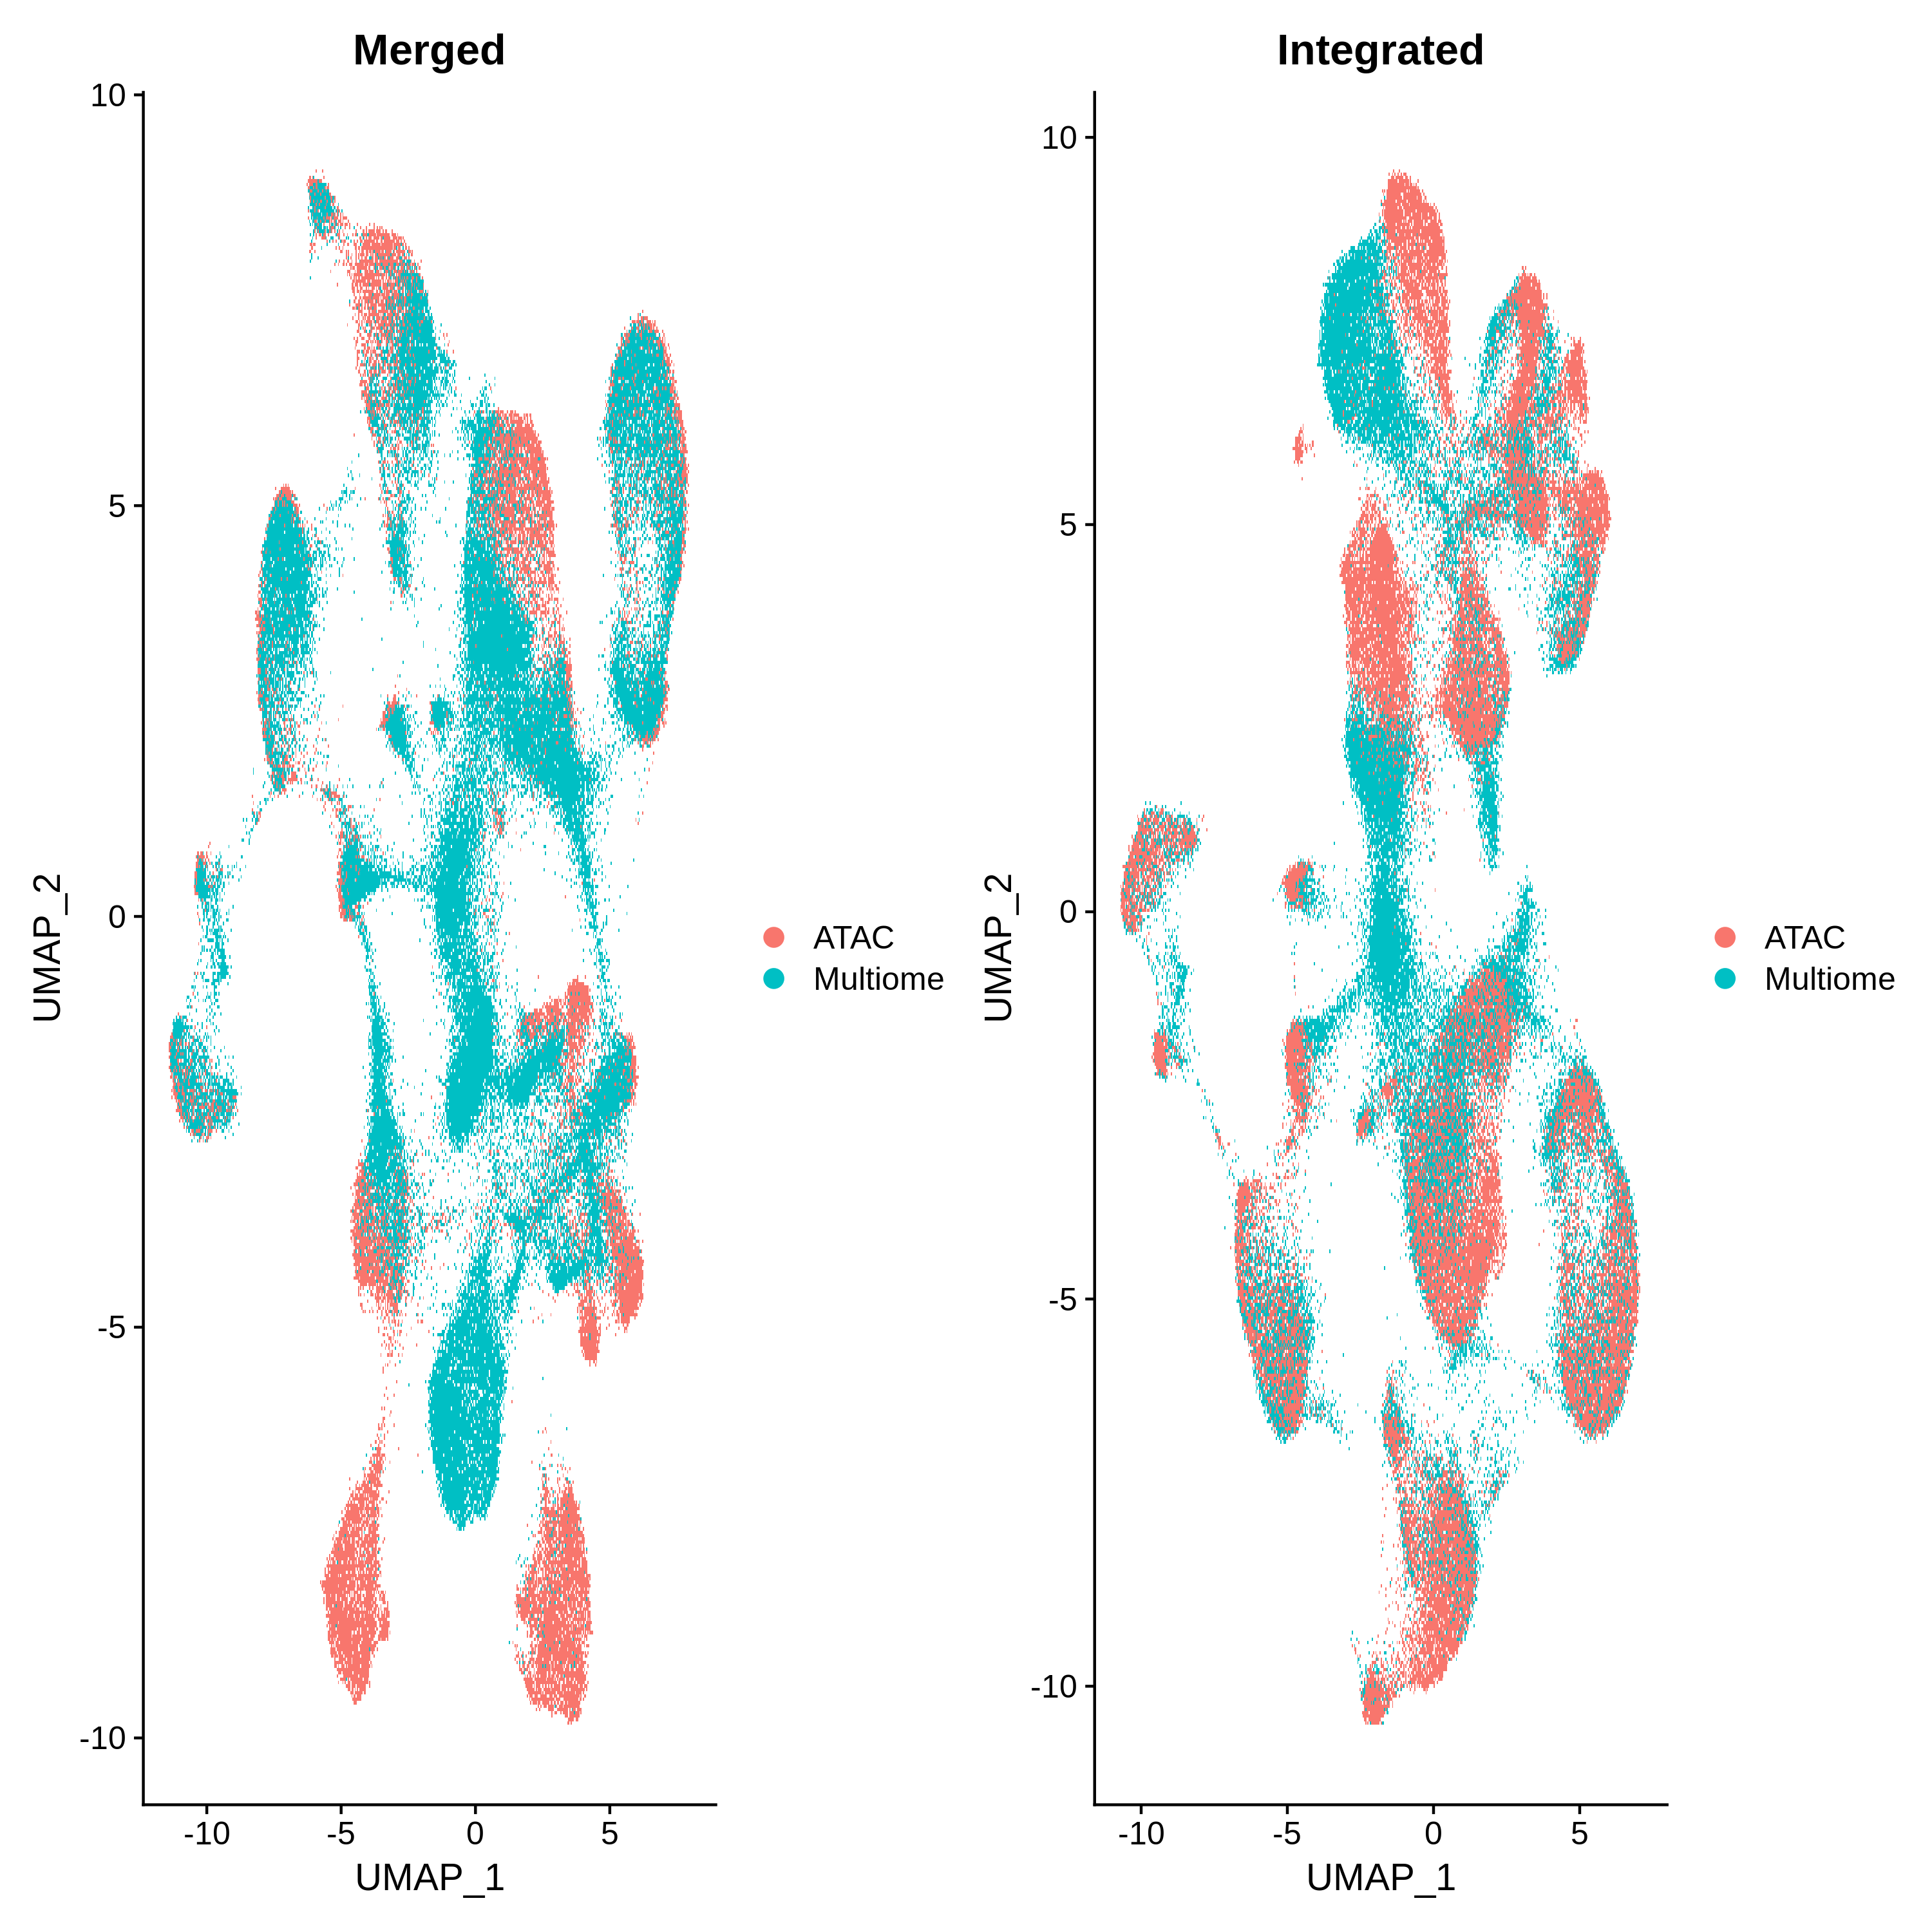

In [60]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

(p1 + ggtitle("Merged")) | (p2 + ggtitle("Integrated"))

***Reference mapping***

In [61]:
# compute UMAP and store the UMAP model
paired_seu <- RunUMAP(paired_seu, reduction = "lsi", dims = 2:30, return.model = TRUE)

# find transfer anchors
transfer.anchors <- FindTransferAnchors(
  reference = paired_seu,
  query = atac_seu,
  reference.reduction = "lsi",
  reduction = "lsiproject",
  dims = 2:30
)

UMAP will return its model

16:15:28 UMAP embedding parameters a = 0.9922 b = 1.112

16:15:28 Read 74460 rows and found 29 numeric columns

16:15:28 Using Annoy for neighbor search, n_neighbors = 30

16:15:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:15:36 Writing NN index file to temp file /tmp/RtmpP4Auk5/file28e427e4a8c

16:15:36 Searching Annoy index using 1 thread, search_k = 3000

16:16:07 Annoy recall = 100%

16:16:09 Commencing smooth kNN distance calibration using 1 thread

16:16:14 Initializing from normalized Laplacian + noise

16:16:18 Commencing optimization for 200 epochs, with 3439426 positive edges

16:17:00 Optimization finished

Projecting new data onto SVD

Finding neighborhoods

Finding anchors

	Found 48977 anchors



In [62]:
# map query onto the reference dataset
atac_seu <- MapQuery(
  anchorset = transfer.anchors,
  reference = paired_seu,
  query = atac_seu,
  refdata = paired_seu$cell_type,
  reference.reduction = "lsi",
  new.reduction.name = "ref.lsi",
  reduction.model = 'umap'
)

Finding integration vectors

Finding integration vector weights

Predicting cell labels


Integrating dataset 2 with reference dataset

Finding integration vectors

Integrating data

Computing nearest neighbors

Running UMAP projection

16:22:22 Read 48098 rows

16:22:22 Processing block 1 of 1

16:22:22 Commencing smooth kNN distance calibration using 1 thread

16:22:23 Initializing by weighted average of neighbor coordinates using 1 thread

16:22:23 Commencing optimization for 67 epochs, with 1442940 positive edges

16:22:29 Finished



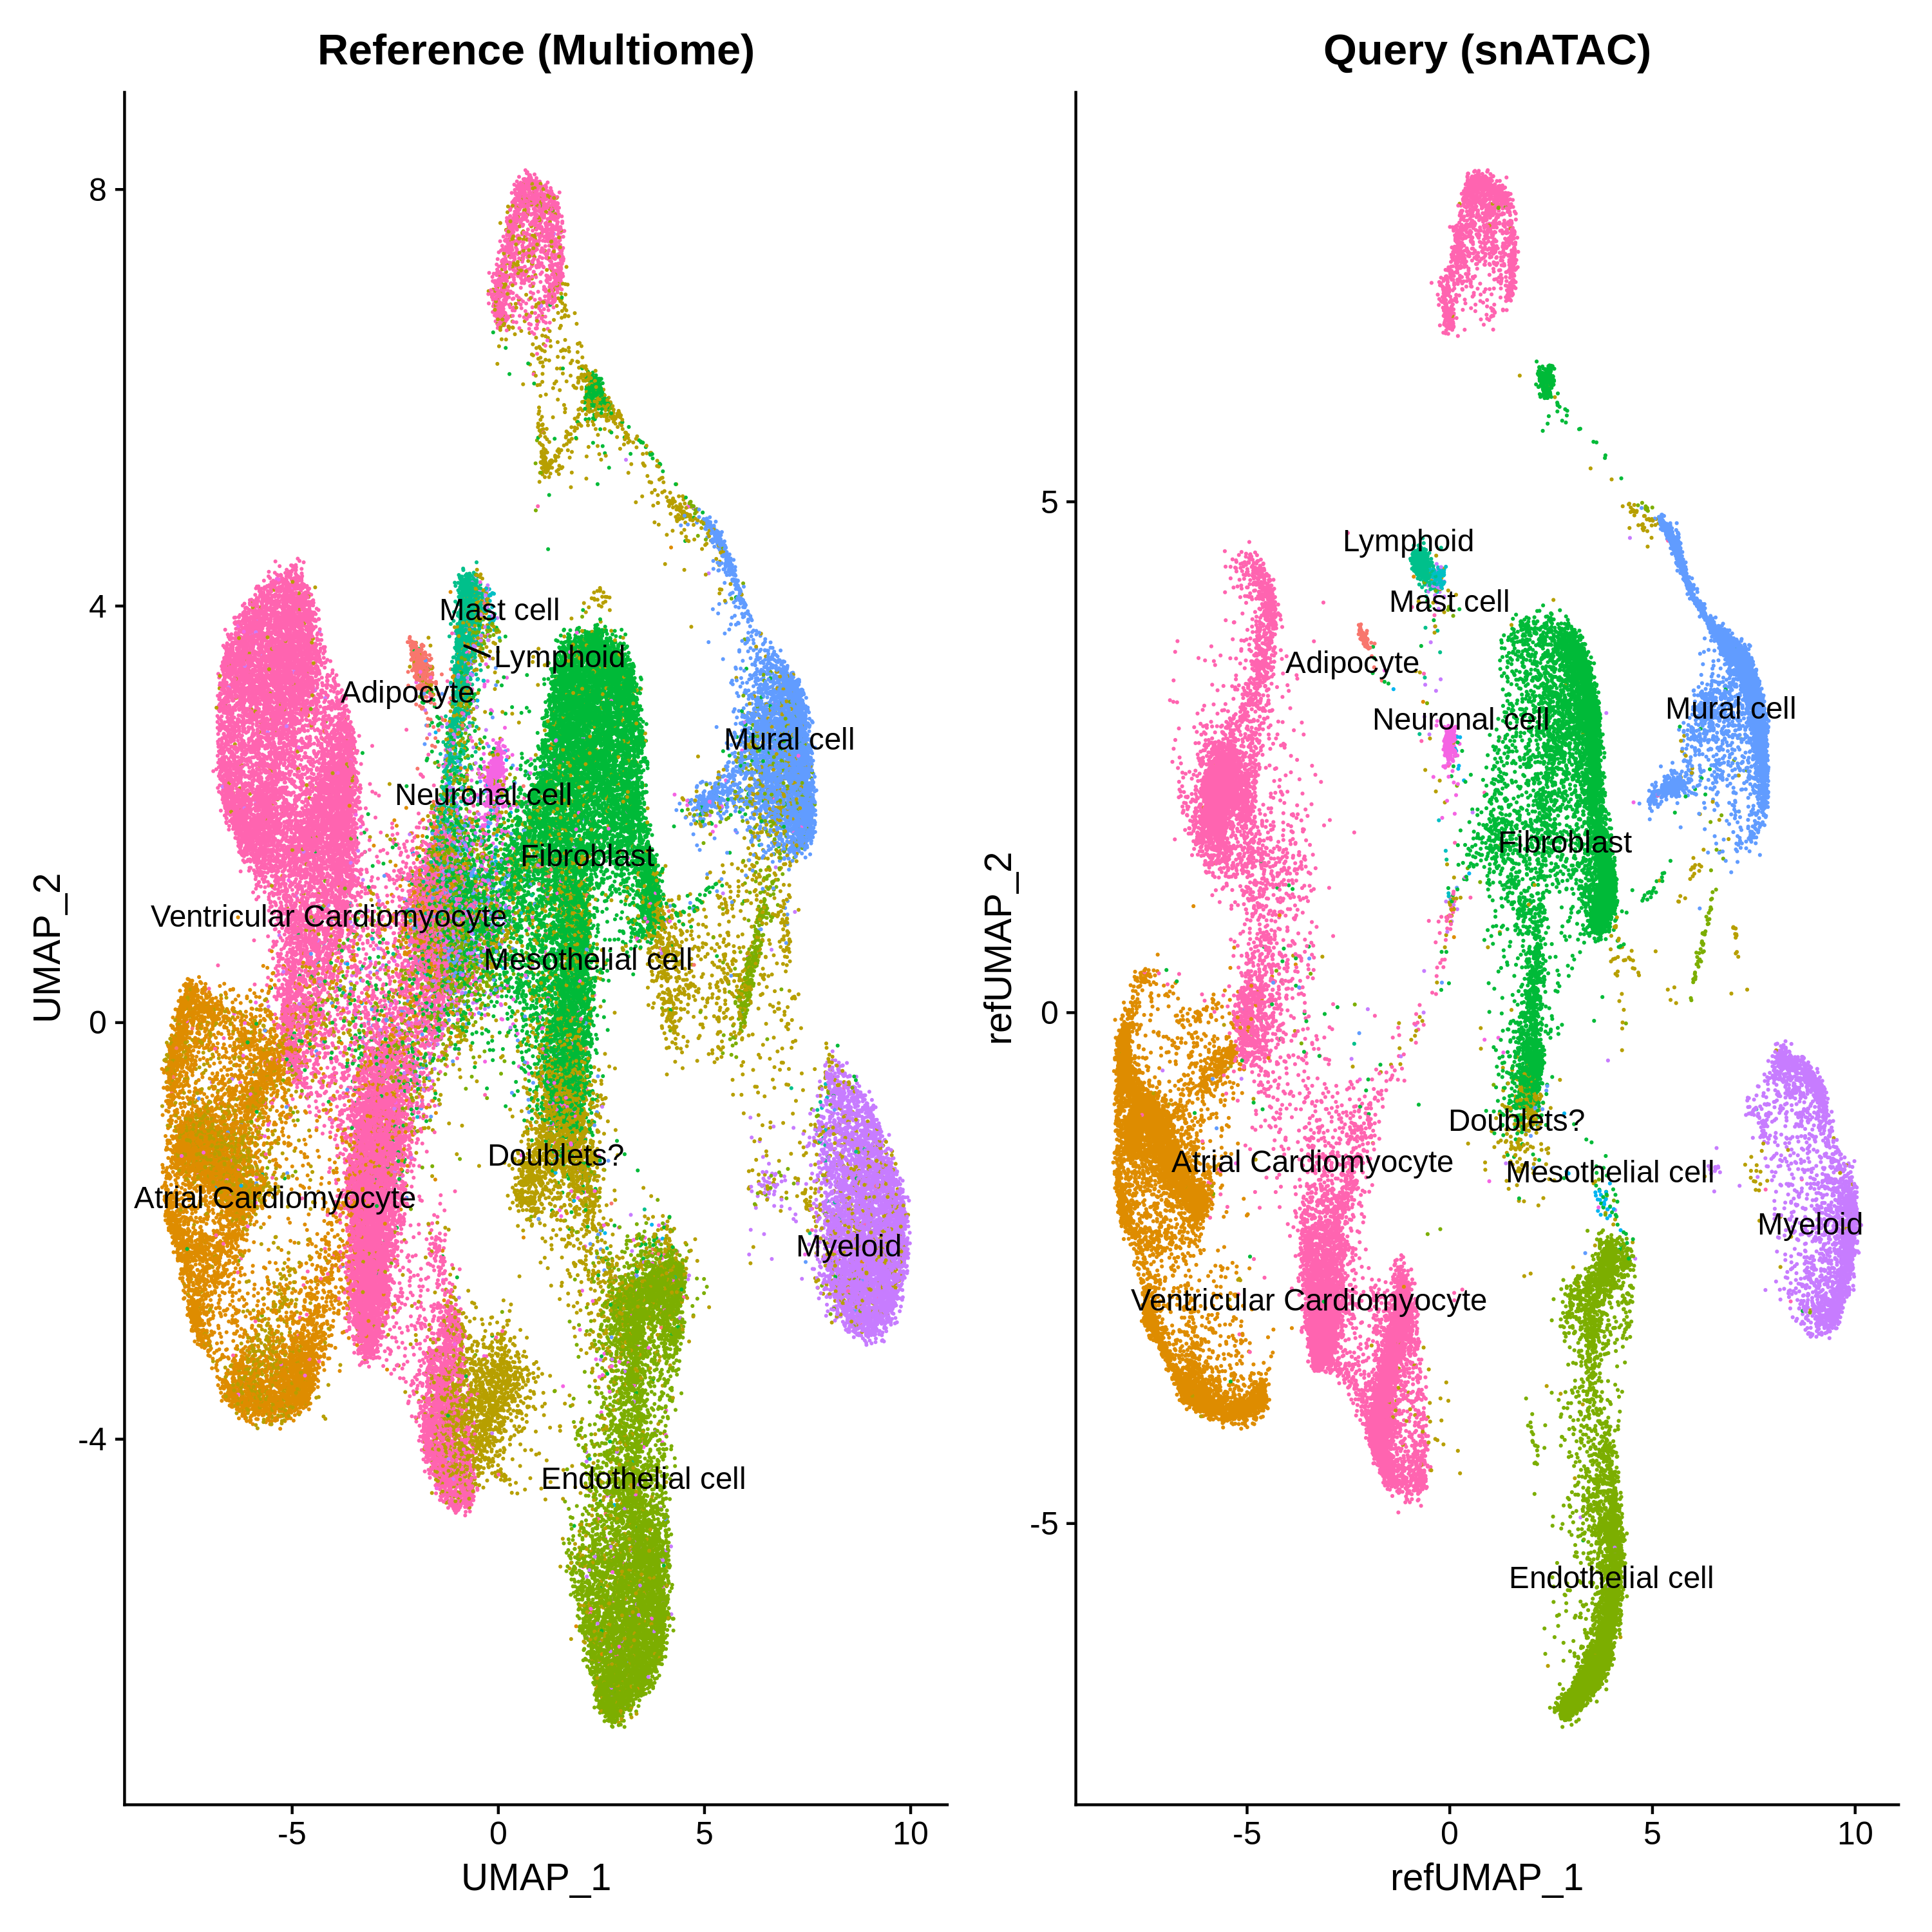

In [63]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)
p1 <- DimPlot(paired_seu, reduction = "umap", group.by = "cell_type", label = TRUE, repel = TRUE) + NoLegend() + ggtitle("Reference (Multiome)")
p2 <- DimPlot(atac_seu, reduction = "ref.umap", group.by = "predicted.id", label = TRUE, repel = TRUE) + NoLegend() + ggtitle("Query (snATAC)")

p1 | p2

***RNA imputation***

In [64]:
# predict gene expression values
rna <- TransferData(
  anchorset = transfer.anchors,
  refdata = GetAssayData(paired_seu, assay = "RNA", slot = "data"),
  weight.reduction = atac_seu[["lsi"]],
  dims = 2:30
)

# add predicted values as a new assay
atac_seu[["predicted"]] <- rna

Finding integration vectors

Finding integration vector weights

Transfering 31915 features onto reference data



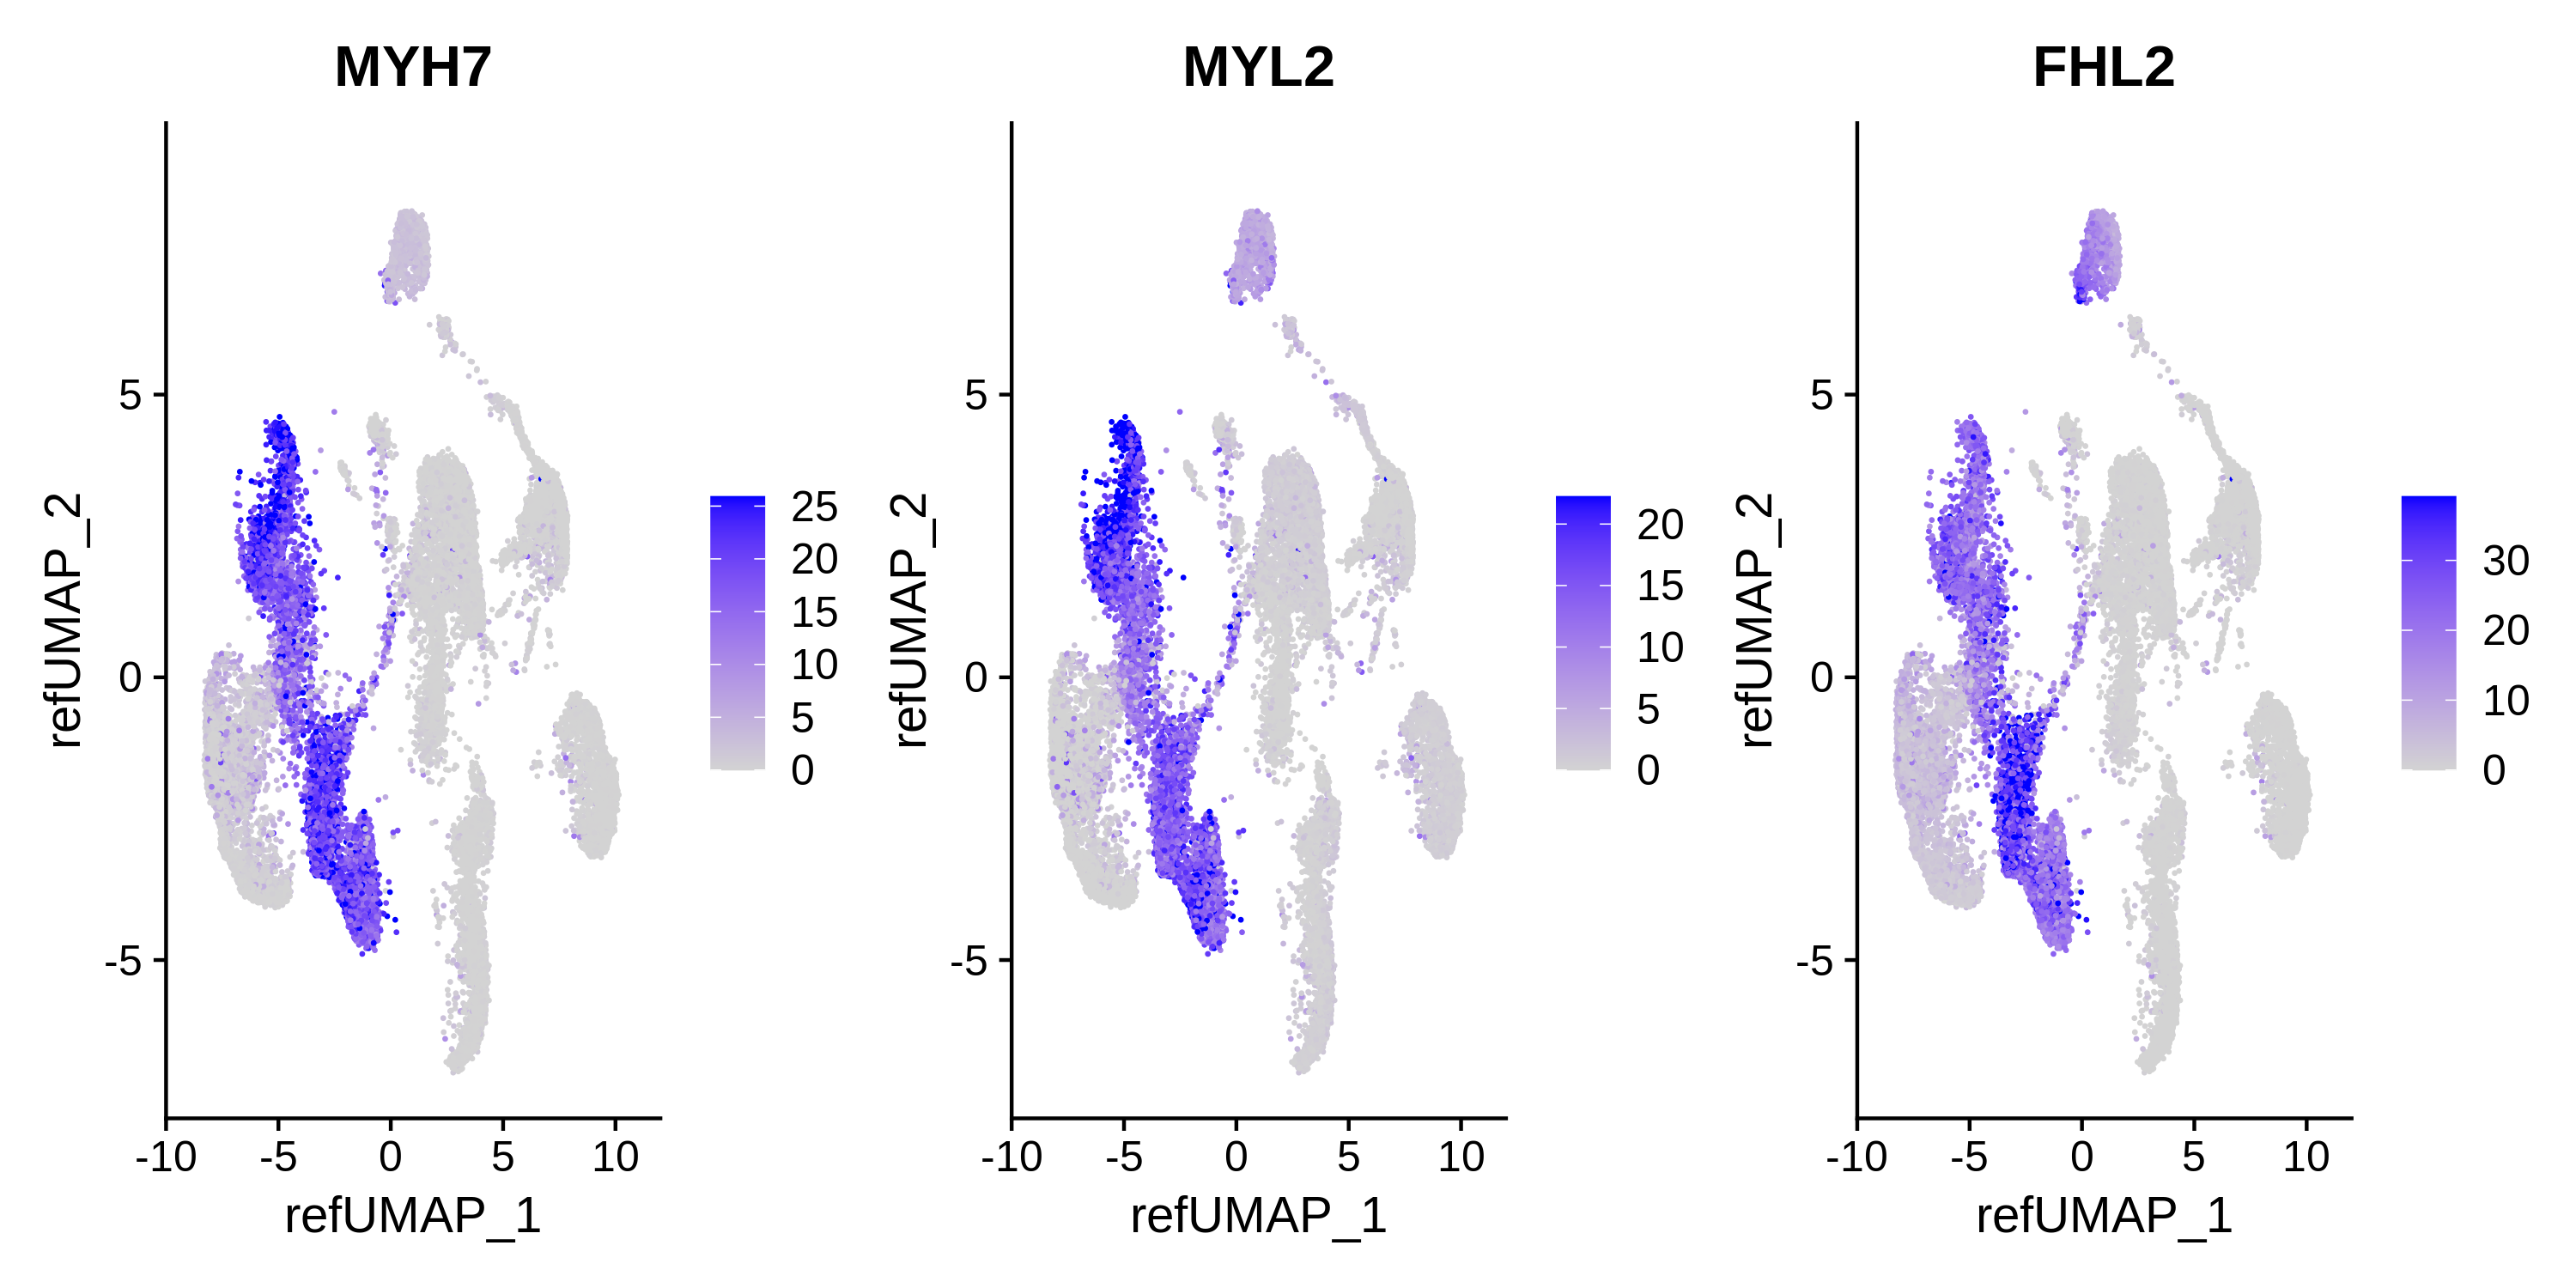

In [65]:
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)

DefaultAssay(atac_seu) <- "predicted"

FeaturePlot(
  object = atac_seu,
  features = c('MYH7', 'MYL2', 'FHL2'),
  pt.size = 0.1,
  max.cutoff = 'q95',
  reduction = "ref.umap",
  ncol = 3
)